<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/solutions/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [187]:
import numpy as np

In [188]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1])

### Understand the data

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. Specifically, look at the shapes of the arrays involved.

In [189]:
print(X.shape, y.shape)

(2, 20) (20,)


### Visualize the dataset

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

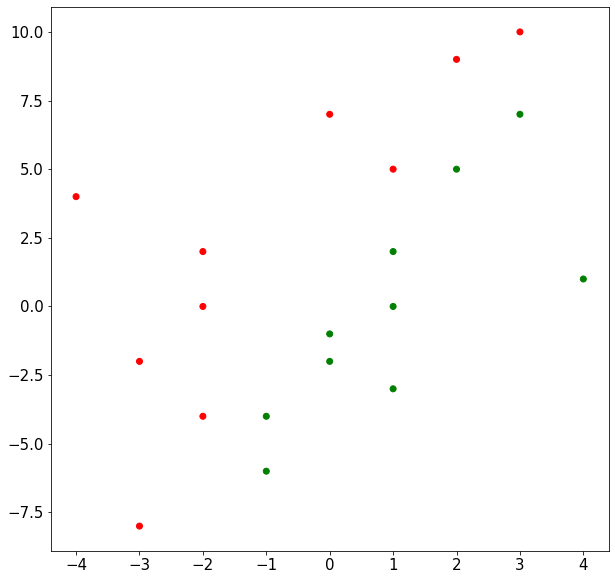

In [190]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 15


color = np.array(['dummy', 'green', 'red'])
plt.scatter(X[0,:], X[1,:], color=color[y])

### Linear Separability

Is there another way to determine linear separability?

In [191]:
w = np.zeros(X.shape[0])
w

array([0., 0.])

In [192]:
i = 0
while not np.all(w@X*y > 0): # go inside the loop, when there is no one misclassification.
  if i == X.shape[1]:
    i = 0
  if (X[:,i] @ w * y[i]) <=0:
      w+= X[:, i] * y[i]
  i +=1


### Computing the Dual Objective

We shall follow a step-by-step approach to computing the dual objective function.

#### Step-1

Compute the object $\mathbf{Y}$ that appears in the dual problem.

In [193]:
Y = np.diag(y)
print(Y.shape) # diagonal elements of the matrix


(20, 20)


#### Step-2

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem.

$$
Q = Y^TX^TXY
$$

In [194]:
Q = Y.T @ X.T @ X @ Y
print(Q.shape)


(20, 20)


#### Step-3

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

In [195]:
def f(alpha):
  return 0.5*alpha@Q@alpha - alpha.sum() # alpha.sum is eq

### Optimize

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Find the optimal value, $\boldsymbol{\alpha^{*}}$.

In [196]:
from scipy import optimize

alpa_init = np.zeros(X.shape[1])
result = optimize.minimize(f, alpa_init, bounds=optimize.Bounds(0, np.inf))
result

      fun: -4.99999999958859
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.00006436e+00,  1.99998782e+00,  9.99992507e+00,  9.99782301e-01,
        1.00005106e+00,  2.00016723e+00, -1.53388414e-04, -6.50146607e-05,
        2.64677171e-05,  1.16173738e-04,  6.00018133e+00,  1.00014148e+00,
        1.50000542e+01,  2.00025791e+00,  7.00002669e+00,  4.99997528e+00,
        5.99991052e+00,  9.99871475e-01,  2.96385140e-04, -2.43627342e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 735
      nit: 30
     njev: 35
   status: 0
  success: True
        x: array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285525, 1.65714065, 1.67142753, 1.68571355,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428422, 1.62856756])

In [197]:
alpha_star = result.x
print(alpha_star)

[0.         0.         0.         0.         0.         0.
 1.64285525 1.65714065 1.67142753 1.68571355 0.         0.
 0.         0.         0.         0.         0.         0.
 1.71428422 1.62856756]


### Support vectors

Find all the support vectors.

Ans: A support vector is a point from X for which $$ α{{*}} >0 $$

In [198]:
support_vectors = X[:,alpha_star > 0]
print(support_vectors)
support_vectors.shape


[[ 2  1  0 -1  3 -3]
 [ 5  2 -1 -4 10 -8]]


(2, 6)

### Optimal weight vector (Primal solution)

Find the optimal weight vector $\mathbf{w}^*$.

$$
 w{{^*}} = XYα
$$

In [199]:
w_star =  X @ Y @ alpha_star
w_star

array([ 2.99998762, -1.00002588])

### Decision Boundary

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot.

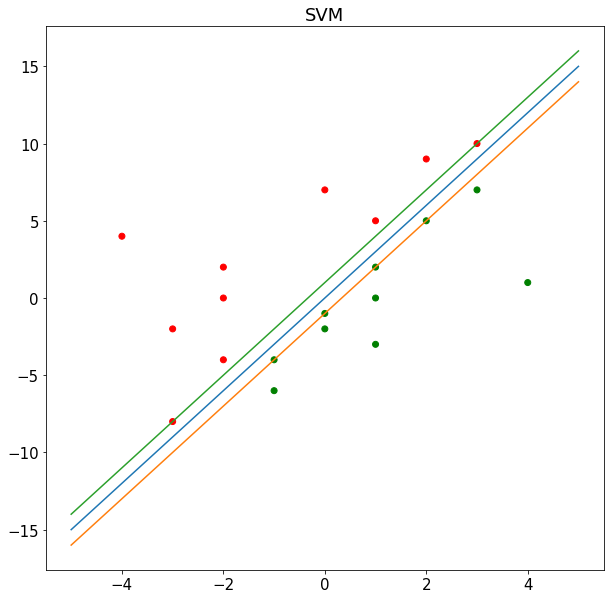

In [200]:
def plot(X, y, w_star, title="SVM"):
  color = np.array(['dummy', 'green', 'red'])
  plt.scatter(X[0,:], X[1,:], color=color[y])
  # plt.scatter(X[0,:], X[1,:], color=color[y])
  #plt.quiver(0, 0 , w_star[0], w_star[1], color='orange', scale=20)
  # Model line
  # w[0]*X + w[1] * y = 0
  line_x = np.linspace(-5, 5)
  line_y = -(w_star[0] * line_x)/w_star[1]
  plt.plot(line_x, line_y)

  # Supporting hyper planes
  # w[0]*X + w[1] * y = 1
  line_yy = -w_star[0]/w_star[1] * line_x + 1 / w_star[1]
  plt.plot(line_x, line_yy)
  line_yyy = -w_star[0]/w_star[1] * line_x - 1 / w_star[1]
  plt.plot(line_x, line_yyy)
  plt.title(title)
  plt.show()

plot(X, y, w_star)

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [201]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1,
              1, 1])

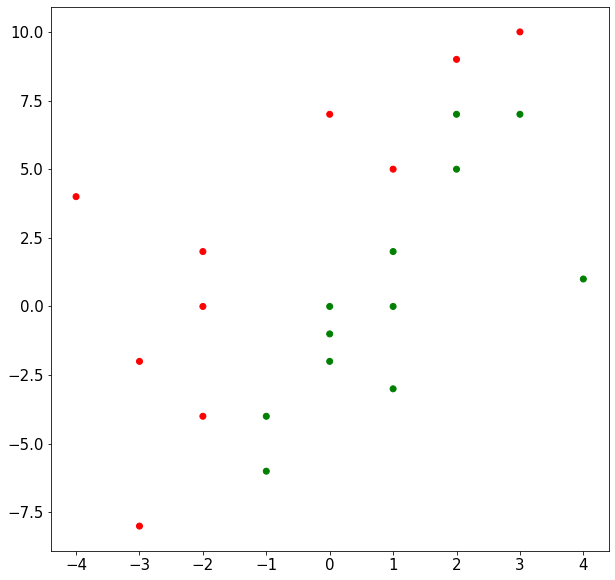

In [202]:
color = np.array(['dummy', 'green', 'red'])
plt.scatter(X[0,:], X[1,:], color=color[y])

In [203]:
w = np.zeros(X.shape[0])
w

array([0., 0.])

In [204]:
Y = np.diag(y)
print(Y.shape) # diagonal elements of the matrix

(22, 22)


In [205]:
Q = Y.T @ X.T @ X @ Y
print(Q.shape)

(22, 22)


### Relationship between $C$ and margin

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


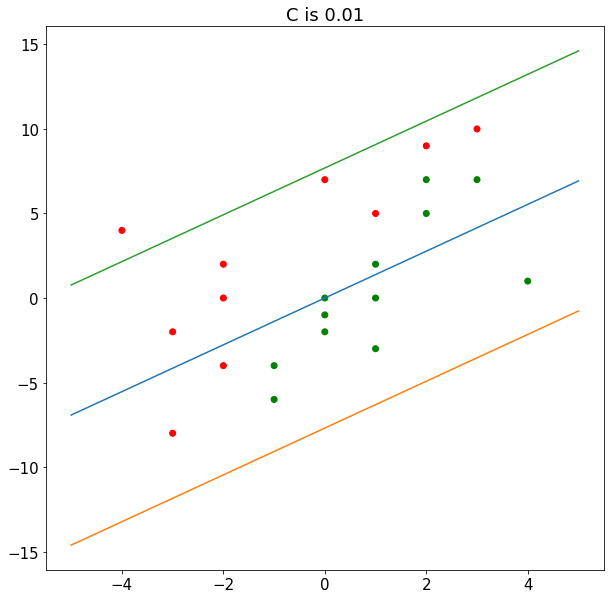

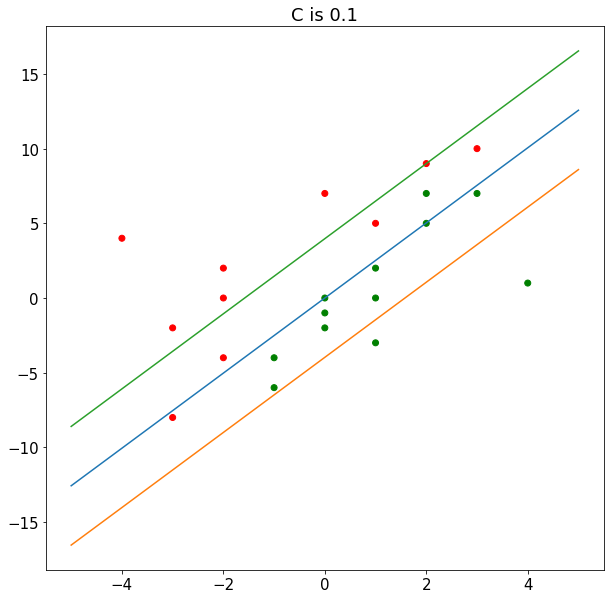

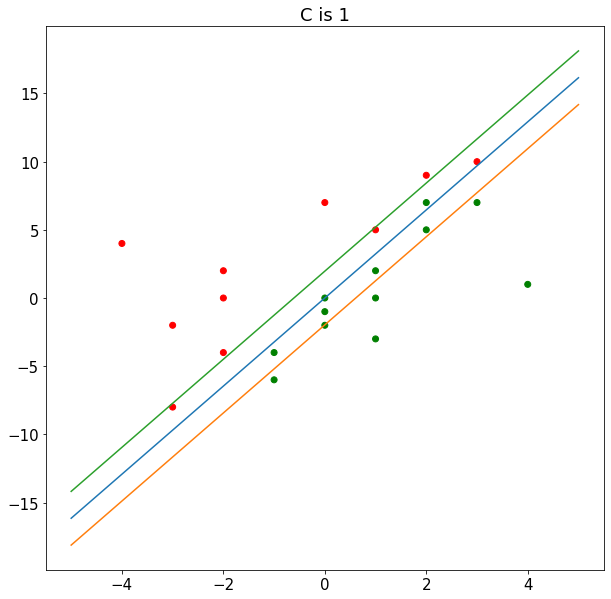

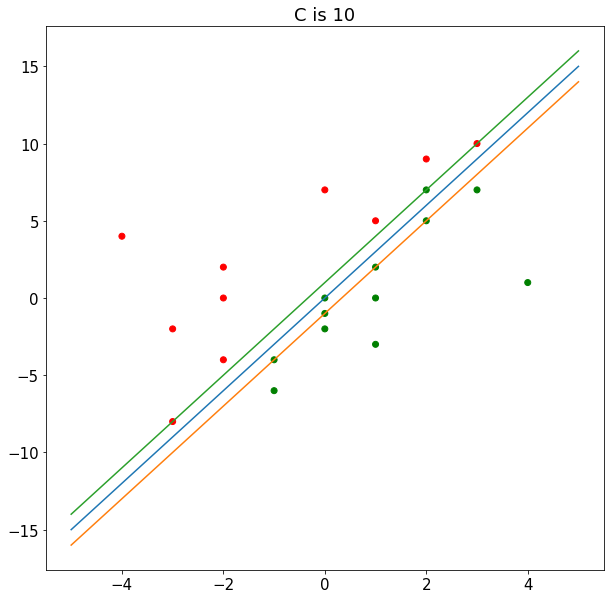

In [207]:
from scipy import optimize

for c in [0.01, 0.1, 1, 10]:
  alpa_init = np.zeros(X.shape[1])
  result = optimize.minimize(f, alpa_init, bounds=optimize.Bounds(0, c))
  alpha_star = result.x
  support_vectors = X[:,alpha_star > 0]
  w_star =  X @ Y @ alpha_star
  plot(X, y, w_star, title="C is " + str(c))

### Support vectors

For $C = 10$, study the number of support vectors that the model has.

In [208]:
support_vectors = X[:,alpha_star > 0]
print(support_vectors)
support_vectors.shape

[[ 2  1  0 -1  3 -3  0  2]
 [ 5  2 -1 -4 10 -8  0  7]]


(2, 8)